In [4]:
%cd/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)

/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)


In [3]:
# Install the vncorenlp python wrapper
!pip install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter) 
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     |████████████████████████████████| 2.7MB 9.5MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp37-none-any.whl size=2645952 sha256=a1c71ac920790625c93da9f1b58ef3c1c665130e2461ebdc1e47d9f38ecd2048
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp
--2021-06-20 13:23:40--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  52.6MB/s    in 0.5s    

2021-06-20 13:23:42 (52.6 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2021-06-20 13:23:42-- 

In [4]:
%%bash
pip install transformers
pip install fastBPE
pip install FAIRSeq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483113 sha256=022069496c32b6320d2167ef69876047e4a7dbd72d15b0734bc4b07a0f16c844
  Stored in directory: /root/.cache/pip/wheels/f3/0c/9c/fc62058b4d473a5602bcd3d3edfece796f123875379ea82d79
Successfully built fastBPE
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp37-none-any.whl size=141231 sha256=392906739678e137fc4518a606c5a9de85f7b70134308f52a90c32f021ffdfaa
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
Successfully built antlr4-python3-runtime
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

text = "Đại học Bách Khoa Hà Nội."

word_segmented_text = rdrsegmenter.tokenize(text) 
print(word_segmented_text)

[['Đại_học', 'Bách_Khoa', 'Hà_Nội', '.']]


In [6]:
%%bash
wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
tar -xzvf PhoBERT_base_transformers.tar.gz

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


--2021-06-20 13:24:09--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 13.225.149.56, 13.225.149.53, 13.225.149.77, ...
Connecting to public.vinai.io (public.vinai.io)|13.225.149.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz.5’

     0K .......... .......... .......... .......... ..........  0% 7.14M 43s
    50K .......... .......... .......... .......... ..........  0% 10.3M 36s
   100K .......... .......... .......... .......... ..........  0% 20.9M 29s
   150K .......... .......... .......... .......... ..........  0% 14.7M 27s
   200K .......... .......... .......... .......... ..........  0% 26.5M 24s
   250K .......... .......... .......... .......... ..........  0% 34.6M 21s
   300K .......... .......... .......... .......... ..........  0% 30.7M 20s
   350K .......... .......... .......... .......... .........

In [7]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/PhoBERT_base_transformers/dict.txt")

In [8]:
bpe.encode('Đm cuộc đời')

'Đ@@ m cuộc đời'

In [9]:
input_ids = vocab.encode_line('<s> ' + 'Đ@@ m cuộc đời' + ' </s>').numpy()
input_ids

array([   0, 1782,  599,  110,  733,    2,    2], dtype=int32)

In [10]:
VN_CHARS_LOWER = u'ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđð'
VN_CHARS_UPPER = u'ẠẢÃÀÁÂẬẦẤẨẪĂẮẰẶẲẴÓÒỌÕỎÔỘỔỖỒỐƠỜỚỢỞỠÉÈẺẸẼÊẾỀỆỂỄÚÙỤỦŨƯỰỮỬỪỨÍÌỊỈĨÝỲỶỴỸÐĐ'
VN_CHARS = VN_CHARS_LOWER + VN_CHARS_UPPER
def no_marks(s):
    __INTAB = [ch for ch in VN_CHARS]
    __OUTTAB = "a"*17 + "o"*17 + "e"*11 + "u"*11 + "i"*5 + "y"*5 + "d"*2
    __OUTTAB += "A"*17 + "O"*17 + "E"*11 + "U"*11 + "I"*5 + "Y"*5 + "D"*2
    __r = re.compile("|".join(__INTAB))
    __replaces_dict = dict(zip(__INTAB, __OUTTAB))
    result = __r.sub(lambda m: __replaces_dict[m.group(0)], s)
    return result

In [11]:
import re

train_path = '/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/train.crash'
test_path = '/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/test.crash'

train_id, train_text, train_labels = [], [], []
test_id, test_text = [], []

with open(train_path, 'r') as f_r:
    data = f_r.read().strip()

    data = re.findall('train_[\s\S]+?\"\n[01]\n\n', data)

    for sample in data:
        splits = sample.strip().split('\n')

        id = splits[0]
        label = int(splits[-1])
        text = ' '.join(splits[1:-1])[1:-1]
        text = rdrsegmenter.tokenize(text)
        text = ' '.join([' '.join(x) for x in text])

        train_id.append(id)
        train_text.append(text)
        train_labels.append(label)
        train_text.append(no_marks(text))
        train_labels.append(label)


with open(test_path, 'r') as f_r:
    data = f_r.read().strip()
    data = re.findall('train_[\s\S]+?\"\n[01]\n\n', data)

    for sample in data:
        splits = sample.strip().split('\n')

        id = splits[0]
        text = ' '.join(splits[1:])[1:-1]
        text = rdrsegmenter.tokenize(text)
        text = ' '.join([' '.join(x) for x in text])

        test_id.append(id)
        test_text.append(text)

In [12]:
train_text

['Dung dc sp tot cam on shop Đóng_gói sản_phẩm rất đẹp và chắc_chắn Chất_lượng sản_phẩm tuyệt_vời',
 'Dung dc sp tot cam on shop Dong_goi san_pham rat dep va chac_chan Chat_luong san_pham tuyet_voi',
 'Chất_lượng sản_phẩm tuyệt_vời . _Son mịn nhưng khi đánh lên không như màu trên ảnh',
 'Chat_luong san_pham tuyet_voi . _Son min nhung khi danh len khong nhu mau tren anh',
 'Chất_lượng sản_phẩm tuyệt_vời nhưng k có hộp k có dây giày đen k có tất',
 'Chat_luong san_pham tuyet_voi nhung k co hop k co day giay den k co tat',
 ': ( ( Mình hơi thất_vọng 1 chút vì mình đã kỳ_vọng cuốn sách khá nhiều hi_vọng nó sẽ nói về việc học_tập của cách sinh_viên trường Harvard ra sao những nỗ_lực của họ như_thế_nào 4h sáng ? tại_sao họ lại phải thức dậy vào thời_khắc đấy ? sau đó là cả một câu_chuyện ra sao . Cái mình thực_sự cần ở đây là câu_chuyện ẩn dấu trong đó để tự bản_thân mỗi người cảm_nhận và đi_sâu vào lòng người hơn . Còn cuốn sách này chỉ đơn_thuần là cuốn sách dạy kĩ_năng mà hầu_như sách nào

In [13]:
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(train_text, train_labels, test_size=0.1)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 125

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [15]:
train_ids

array([[    0,  3593, 45729, ...,     0,     0,     0],
       [    0, 18070,  2644, ...,     0,     0,     0],
       [    0,  1735, 43299, ...,     0,     0,     0],
       ...,
       [    0,  9783,  3931, ...,     0,     0,     0],
       [    0,  7138,  3872, ...,     0,     0,     0],
       [    0,  6279,  1204, ...,     0,     0,     0]])

In [16]:
len(train_ids[1])

125

In [17]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [18]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [19]:
train_dataloader

In [30]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    "/content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/PhoBERT_base_transformers/model.bin",
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/drive/My Drive/Đồ án 2 (Sentiment Analysis Vietnamese)/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializi

In [31]:
BERT_SA.cuda()
print('Done')

Done


In [32]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [ ]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 50

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 50 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.8311
 F1 score: 0.8178
 Average training loss: 0.3612
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.8852
 F1 score: 0.8810
======== Epoch 2 / 50 ========
Training...



 Accuracy: 0.8993
 F1 score: 0.8945
 Average training loss: 0.2505
Running Validation...



 Accuracy: 0.8994
 F1 score: 0.8950
======== Epoch 3 / 50 ========
Training...



 Accuracy: 0.9186
 F1 score: 0.9146
 Average training loss: 0.2106
Running Validation...



 Accuracy: 0.9035
 F1 score: 0.8992
======== Epoch 4 / 50 ========
Training...



 Accuracy: 0.9327
 F1 score: 0.9293
 Average training loss: 0.1804
Running Validation...



 Accuracy: 0.9072
 F1 score: 0.9031
======== Epoch 5 / 50 ========
Training...



 Accuracy: 0.9408
 F1 score: 0.9378
 Average training loss: 0.1640
Running Validation...



 Accuracy: 0.9047
 F1 score: 0.9007
======== Epoch 6 / 50 ========
Training...



 Accuracy: 0.9512
 F1 score: 0.9489
 Average training loss: 0.1425
Running Validation...



 Accuracy: 0.9022
 F1 score: 0.8979
======== Epoch 7 / 50 ========
Training...



 Accuracy: 0.9579
 F1 score: 0.9558
 Average training loss: 0.1276
Running Validation...



 Accuracy: 0.9072
 F1 score: 0.9024
======== Epoch 8 / 50 ========
Training...



 Accuracy: 0.9636
 F1 score: 0.9617
 Average training loss: 0.1129
Running Validation...



 Accuracy: 0.9100
 F1 score: 0.9059
======== Epoch 9 / 50 ========
Training...



 Accuracy: 0.9696
 F1 score: 0.9680
 Average training loss: 0.0994
Running Validation...



 Accuracy: 0.9087
 F1 score: 0.9043
======== Epoch 10 / 50 ========
Training...



 Accuracy: 0.9717
 F1 score: 0.9703
 Average training loss: 0.0933
Running Validation...



 Accuracy: 0.9066
 F1 score: 0.9020
======== Epoch 11 / 50 ========
Training...



 Accuracy: 0.9753
 F1 score: 0.9740
 Average training loss: 0.0861
Running Validation...



 Accuracy: 0.9097
 F1 score: 0.9048
======== Epoch 12 / 50 ========
Training...



 Accuracy: 0.9787
 F1 score: 0.9775
 Average training loss: 0.0769
Running Validation...



 Accuracy: 0.9072
 F1 score: 0.9027
======== Epoch 13 / 50 ========
Training...



 Accuracy: 0.9824
 F1 score: 0.9814
 Average training loss: 0.0673
Running Validation...



 Accuracy: 0.9069
 F1 score: 0.9027
======== Epoch 14 / 50 ========
Training...



 Accuracy: 0.9825
 F1 score: 0.9815
 Average training loss: 0.0650
Running Validation...



 Accuracy: 0.9056
 F1 score: 0.9017
======== Epoch 15 / 50 ========
Training...



 Accuracy: 0.9867
 F1 score: 0.9859
 Average training loss: 0.0540
Running Validation...



 Accuracy: 0.9128
 F1 score: 0.9086
======== Epoch 16 / 50 ========
Training...



 Accuracy: 0.9883
 F1 score: 0.9876
 Average training loss: 0.0479
Running Validation...



 Accuracy: 0.9137
 F1 score: 0.9097
======== Epoch 17 / 50 ========
Training...



 Accuracy: 0.9889
 F1 score: 0.9883
 Average training loss: 0.0440
Running Validation...



 Accuracy: 0.9084
 F1 score: 0.9047
======== Epoch 18 / 50 ========
Training...



 Accuracy: 0.9898
 F1 score: 0.9893
 Average training loss: 0.0399
Running Validation...



 Accuracy: 0.9118
 F1 score: 0.9079
======== Epoch 19 / 50 ========
Training...



 Accuracy: 0.9909
 F1 score: 0.9904
 Average training loss: 0.0372
Running Validation...



 Accuracy: 0.9084
 F1 score: 0.9043
======== Epoch 20 / 50 ========
Training...



 Accuracy: 0.9917
 F1 score: 0.9913
 Average training loss: 0.0361
Running Validation...



 Accuracy: 0.9100
 F1 score: 0.9055
======== Epoch 21 / 50 ========
Training...



 Accuracy: 0.9930
 F1 score: 0.9927
 Average training loss: 0.0275
Running Validation...



 Accuracy: 0.9127
 F1 score: 0.9086
======== Epoch 22 / 50 ========
Training...



 Accuracy: 0.9933
 F1 score: 0.9929
 Average training loss: 0.0276
Running Validation...



 Accuracy: 0.9121
 F1 score: 0.9084
======== Epoch 23 / 50 ========
Training...



 Accuracy: 0.9932
 F1 score: 0.9929
 Average training loss: 0.0273
Running Validation...



 Accuracy: 0.9118
 F1 score: 0.9071
======== Epoch 24 / 50 ========
Training...



 Accuracy: 0.9947
 F1 score: 0.9944
 Average training loss: 0.0226
Running Validation...



 Accuracy: 0.9131
 F1 score: 0.9086
======== Epoch 25 / 50 ========
Training...



 Accuracy: 0.9952
 F1 score: 0.9950
 Average training loss: 0.0208
Running Validation...



 Accuracy: 0.9090
 F1 score: 0.9056
======== Epoch 26 / 50 ========
Training...



 Accuracy: 0.9946
 F1 score: 0.9944
 Average training loss: 0.0241
Running Validation...



 Accuracy: 0.9146
 F1 score: 0.9110
======== Epoch 27 / 50 ========
Training...



 Accuracy: 0.9950
 F1 score: 0.9947
 Average training loss: 0.0217
Running Validation...



 Accuracy: 0.9075
 F1 score: 0.9035
======== Epoch 28 / 50 ========
Training...



 Accuracy: 0.9955
 F1 score: 0.9953
 Average training loss: 0.0199
Running Validation...



 Accuracy: 0.9059
 F1 score: 0.9026
======== Epoch 29 / 50 ========
Training...



 Accuracy: 0.9946
 F1 score: 0.9944
 Average training loss: 0.0241
Running Validation...



 Accuracy: 0.9100
 F1 score: 0.9059
======== Epoch 30 / 50 ========
Training...



 Accuracy: 0.9958
 F1 score: 0.9955
 Average training loss: 0.0187
Running Validation...



 Accuracy: 0.9081
 F1 score: 0.9041
======== Epoch 31 / 50 ========
Training...



 Accuracy: 0.9960
 F1 score: 0.9957
 Average training loss: 0.0173
Running Validation...



 Accuracy: 0.9131
 F1 score: 0.9095
======== Epoch 32 / 50 ========
Training...



 Accuracy: 0.9967
 F1 score: 0.9965
 Average training loss: 0.0153
Running Validation...



 Accuracy: 0.9109
 F1 score: 0.9067
======== Epoch 33 / 50 ========
Training...



 Accuracy: 0.9963
 F1 score: 0.9962
 Average training loss: 0.0161
Running Validation...



 Accuracy: 0.9115
 F1 score: 0.9073
======== Epoch 34 / 50 ========
Training...


In [ ]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 30

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    loss_valid = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    with open('./logs/train_score.txt','a') as f:
      f.write(str(train_accuracy/nb_train_steps))
      f.write(' ')
      f.write(str(avg_train_loss))
      f.write('\n')
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for step, batch in tqdm_notebook(enumerate(val_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        loss_valid += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        eval_f1 += tmp_eval_f1
        nb_eval_steps += 1
        
    avg_valid_loss = loss_valid / len(val_dataloader)
    with open('./logs/test_score.txt','a') as f:
      f.write(str(eval_accuracy/nb_eval_steps))
      f.write(' ')
      f.write(str(avg_valid_loss))
      f.write('\n')
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
    print(" Average valid loss: {0:.4f}".format(avg_valid_loss))
print("Training complete!")

======== Epoch 1 / 30 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.8567
 F1 score: 0.8468
 Average training loss: 0.3269
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



 Accuracy: 0.8900
 F1 score: 0.8864
 Average valid loss: 0.2674
======== Epoch 2 / 30 ========
Training...



 Accuracy: 0.9031
 F1 score: 0.8980
 Average training loss: 0.2384
Running Validation...



 Accuracy: 0.9017
 F1 score: 0.8978
 Average valid loss: 0.2636
======== Epoch 3 / 30 ========
Training...



 Accuracy: 0.9227
 F1 score: 0.9184
 Average training loss: 0.2036
Running Validation...



 Accuracy: 0.9076
 F1 score: 0.9040
 Average valid loss: 0.2714
======== Epoch 4 / 30 ========
Training...



 Accuracy: 0.9341
 F1 score: 0.9306
 Average training loss: 0.1759
Running Validation...



 Accuracy: 0.9079
 F1 score: 0.9039
 Average valid loss: 0.2845
======== Epoch 5 / 30 ========
Training...



 Accuracy: 0.9444
 F1 score: 0.9414
 Average training loss: 0.1565
Running Validation...



 Accuracy: 0.9021
 F1 score: 0.8978
 Average valid loss: 0.2776
======== Epoch 6 / 30 ========
Training...



 Accuracy: 0.9528
 F1 score: 0.9502
 Average training loss: 0.1394
Running Validation...



 Accuracy: 0.9048
 F1 score: 0.9011
 Average valid loss: 0.3280
======== Epoch 7 / 30 ========
Training...



 Accuracy: 0.9605
 F1 score: 0.9583
 Average training loss: 0.1235
Running Validation...



 Accuracy: 0.9034
 F1 score: 0.9001
 Average valid loss: 0.3308
======== Epoch 8 / 30 ========
Training...



 Accuracy: 0.9657
 F1 score: 0.9637
 Average training loss: 0.1101
Running Validation...



 Accuracy: 0.9116
 F1 score: 0.9080
 Average valid loss: 0.3309
======== Epoch 9 / 30 ========
Training...



 Accuracy: 0.9702
 F1 score: 0.9685
 Average training loss: 0.1005
Running Validation...



 Accuracy: 0.9086
 F1 score: 0.9048
 Average valid loss: 0.3710
======== Epoch 10 / 30 ========
Training...



 Accuracy: 0.9742
 F1 score: 0.9728
 Average training loss: 0.0882
Running Validation...



 Accuracy: 0.9070
 F1 score: 0.9026
 Average valid loss: 0.4010
======== Epoch 11 / 30 ========
Training...



 Accuracy: 0.9783
 F1 score: 0.9770
 Average training loss: 0.0771
Running Validation...



 Accuracy: 0.9151
 F1 score: 0.9117
 Average valid loss: 0.4161
======== Epoch 12 / 30 ========
Training...



 Accuracy: 0.9800
 F1 score: 0.9788
 Average training loss: 0.0726
Running Validation...



 Accuracy: 0.9095
 F1 score: 0.9059
 Average valid loss: 0.4476
======== Epoch 13 / 30 ========
Training...



 Accuracy: 0.9827
 F1 score: 0.9816
 Average training loss: 0.0648
Running Validation...



 Accuracy: 0.9116
 F1 score: 0.9084
 Average valid loss: 0.5285
======== Epoch 14 / 30 ========
Training...



 Accuracy: 0.9846
 F1 score: 0.9837
 Average training loss: 0.0579
Running Validation...



 Accuracy: 0.9064
 F1 score: 0.9028
 Average valid loss: 0.5394
======== Epoch 15 / 30 ========
Training...



 Accuracy: 0.9873
 F1 score: 0.9866
 Average training loss: 0.0482
Running Validation...



 Accuracy: 0.9033
 F1 score: 0.8978
 Average valid loss: 0.6525
======== Epoch 16 / 30 ========
Training...



 Accuracy: 0.9890
 F1 score: 0.9884
 Average training loss: 0.0458
Running Validation...



 Accuracy: 0.9126
 F1 score: 0.9078
 Average valid loss: 0.5994
======== Epoch 17 / 30 ========
Training...



 Accuracy: 0.9897
 F1 score: 0.9891
 Average training loss: 0.0413
Running Validation...



 Accuracy: 0.9163
 F1 score: 0.9124
 Average valid loss: 0.5712
======== Epoch 18 / 30 ========
Training...



 Accuracy: 0.9897
 F1 score: 0.9891
 Average training loss: 0.0434
Running Validation...



 Accuracy: 0.9107
 F1 score: 0.9061
 Average valid loss: 0.5619
======== Epoch 19 / 30 ========
Training...



 Accuracy: 0.9921
 F1 score: 0.9917
 Average training loss: 0.0333
Running Validation...



 Accuracy: 0.9135
 F1 score: 0.9095
 Average valid loss: 0.6327
======== Epoch 20 / 30 ========
Training...



 Accuracy: 0.9924
 F1 score: 0.9919
 Average training loss: 0.0332
Running Validation...



 Accuracy: 0.9110
 F1 score: 0.9063
 Average valid loss: 0.6003
======== Epoch 21 / 30 ========
Training...



 Accuracy: 0.9931
 F1 score: 0.9927
 Average training loss: 0.0286
Running Validation...



 Accuracy: 0.9144
 F1 score: 0.9104
 Average valid loss: 0.5999
======== Epoch 22 / 30 ========
Training...



 Accuracy: 0.9939
 F1 score: 0.9935
 Average training loss: 0.0263
Running Validation...



 Accuracy: 0.9116
 F1 score: 0.9071
 Average valid loss: 0.6173
======== Epoch 23 / 30 ========
Training...



 Accuracy: 0.9939
 F1 score: 0.9935
 Average training loss: 0.0264
Running Validation...



 Accuracy: 0.9169
 F1 score: 0.9132
 Average valid loss: 0.6204
======== Epoch 24 / 30 ========
Training...



 Accuracy: 0.9950
 F1 score: 0.9946
 Average training loss: 0.0209
Running Validation...



 Accuracy: 0.9138
 F1 score: 0.9095
 Average valid loss: 0.6709
======== Epoch 25 / 30 ========
Training...



 Accuracy: 0.9945
 F1 score: 0.9942
 Average training loss: 0.0221
Running Validation...



 Accuracy: 0.9129
 F1 score: 0.9083
 Average valid loss: 0.7120
======== Epoch 26 / 30 ========
Training...



 Accuracy: 0.9950
 F1 score: 0.9947
 Average training loss: 0.0215
Running Validation...



 Accuracy: 0.9141
 F1 score: 0.9098
 Average valid loss: 0.7154
======== Epoch 27 / 30 ========
Training...


In [25]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
with open ('./logs/train_score.txt','r') as f:
  lines = f.read().splitlines()
  for line in lines:
    line = line.split()
    train_acc.append(float(line[0]))
    train_loss.append(float(line[1]))
with open ('./logs/test_score.txt','r') as f:
  lines = f.read().splitlines()
  for line in lines:
    line = line.split()
    val_acc.append(float(line[0]))
    val_loss.append(float(line[1]))

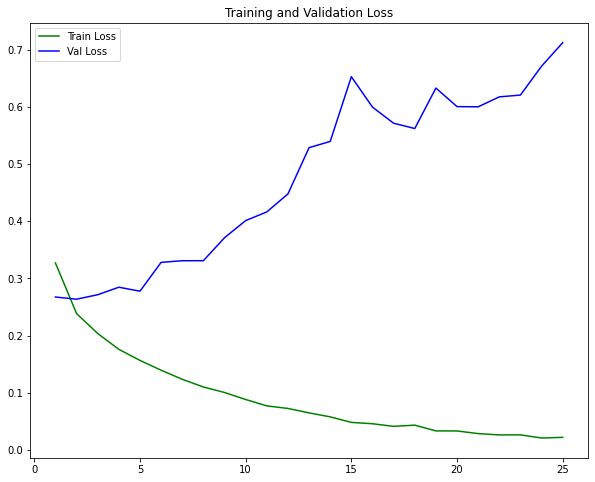

In [43]:
import matplotlib.pyplot as plt
#Plot the Graph
# Loss Curves
plt.figure(figsize=[10,8])
epochs = range(1,26)
plt.plot(epochs, train_loss, 'g', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and Validation Loss')
#plt.xlim(0.5,10.5)
#plt.xticks(epochs)
plt.legend()
plt.show()